In [2]:
# Imports
from __future__ import print_function
import time
import sys
import warnings

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

#This line is used to show all the attributes of the tables. 
#This will show upto 2000 columns per table
pd.set_option('display.max_columns', 2000) 

# machine learning
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

from xgboost import XGBRegressor
print(__doc__)

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
warnings.filterwarnings('ignore')

Automatically created module for IPython interactive environment


In [3]:
# Load dataset
# train = pd.read_csv('./AmesDummies.csv')
train = pd.read_csv('../data/AmesDummiesOrdinal.csv', index_col=0)

In [5]:
train.shape

(1458, 186)

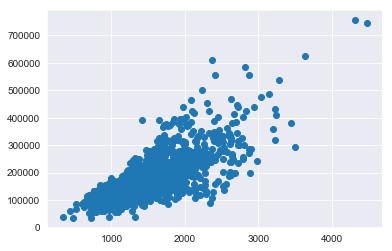

In [6]:
sns.set_style('darkgrid')
plt.scatter(train['TotalSF'], train['SalePrice'])

(array([  5.,  11.,  13.,  61.,  58., 126., 165., 180., 121., 130., 120.,
         78.,  61.,  64.,  49.,  36.,  36.,  25.,  13.,  25.,  16.,  11.,
          4.,  11.,   9.,   5.,   4.,   4.,   4.,   2.,   1.,   1.,   1.,
          0.,   1.,   0.,   2.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.,  49302.,  63704.,  78106.,  92508., 106910., 121312.,
        135714., 150116., 164518., 178920., 193322., 207724., 222126.,
        236528., 250930., 265332., 279734., 294136., 308538., 322940.,
        337342., 351744., 366146., 380548., 394950., 409352., 423754.,
        438156., 452558., 466960., 481362., 495764., 510166., 524568.,
        538970., 553372., 567774., 582176., 596578., 610980., 625382.,
        639784., 654186., 668588., 682990., 697392., 711794., 726196.,
        740598., 755000.]),
 <a list of 50 Patch objects>)

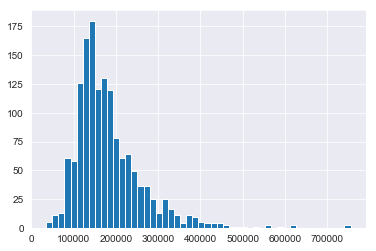

In [5]:
plt.hist(train['SalePrice'], bins = 50)

In [6]:
PureCategorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
                  'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Foundation', 'MasVnrType', 'Heating', 'CentralAir', 'Electrical',
                  'GarageType', 'SaleType','SaleCondition']
QuesCategorical = ['LotShape', 'Utilities']
OrdCategorical = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
                 'PavedDrive', 'PoolQC','Fence']
JointFeatures = ['Condition1', 'Condition2', 'Exterior1st', 'Exterior2nd']
Numerical = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtScore', 'TotalBsmtSF', 'TotalSF',
            'PctLowQual', 'AboveGroundPct', 'TotalBath', 'Bedroom', 'Kitchen', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
            'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
            'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

In [7]:
corr = train.corr()

In [8]:
corr_df = pd.DataFrame(corr['SalePrice'].values,
                  index=[corr.columns.values])
corr_df.columns = ['SalePrice']

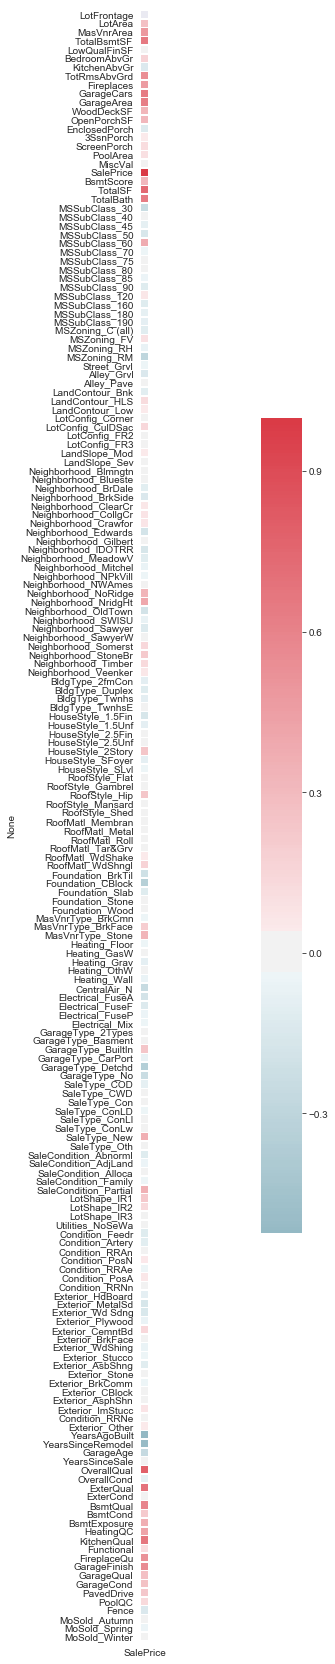

In [9]:
f, ax = plt.subplots(figsize=(40,30))
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_df, mask=mask, cmap=cmap, 
            yticklabels=corr.columns.values,
            center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [8]:
# corr[(corr > 0.2) | (corr < -0.2)]['SalePrice'].sort_values(ascending=False).iloc[:47]

SalePrice                1.000
OverallQual              0.796
TotalSF                  0.744
ExterQual                0.687
KitchenQual              0.662
TotalBsmtSF              0.651
GarageCars               0.641
TotalBath                0.636
GarageArea               0.629
BsmtQual                 0.587
GarageFinish             0.550
TotRmsAbvGrd             0.538
FireplaceQu              0.521
MasVnrArea               0.478
Fireplaces               0.470
HeatingQC                0.428
Neighborhood_NridgHt     0.402
MSSubClass_60            0.379
BsmtExposure             0.363
SaleType_New             0.361
SaleCondition_Partial    0.355
MasVnrType_Stone         0.333
Neighborhood_NoRidge     0.330
LotFrontage              0.325
WoodDeckSF               0.325
OpenPorchSF              0.321
BsmtScore                0.313
GarageQual               0.274
LotArea                  0.268
GarageCond               0.263
HouseStyle_2Story        0.243
RoofStyle_Hip            0.237
GarageTy

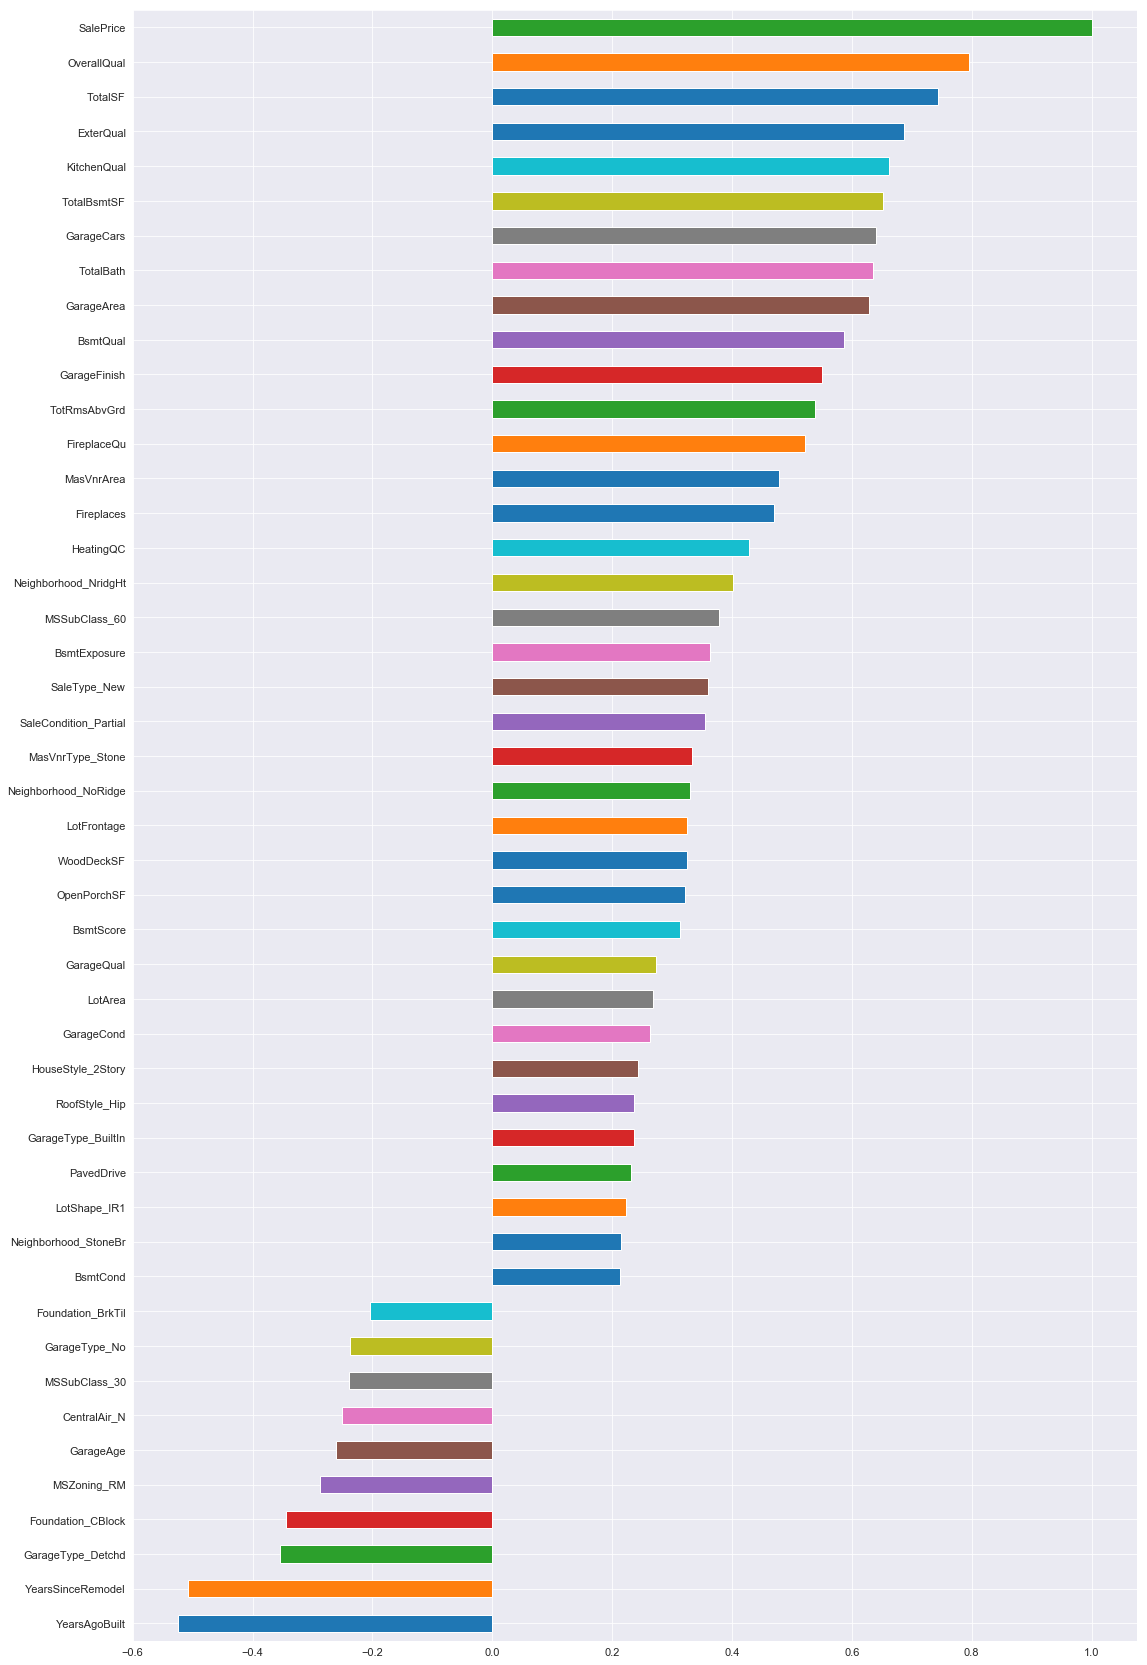

In [10]:
plt.figure(figsize=(18, 30))
c = pd.Series(corr['SalePrice'])
pos = c[(corr['SalePrice'] > 0.2) | (corr['SalePrice'] < -0.2)].sort_values()
# c.plot(kind="barh", fontsize = 11)
pos.plot(kind='barh', fontsize = 11)

### Heatmaps with OrdinalDummies

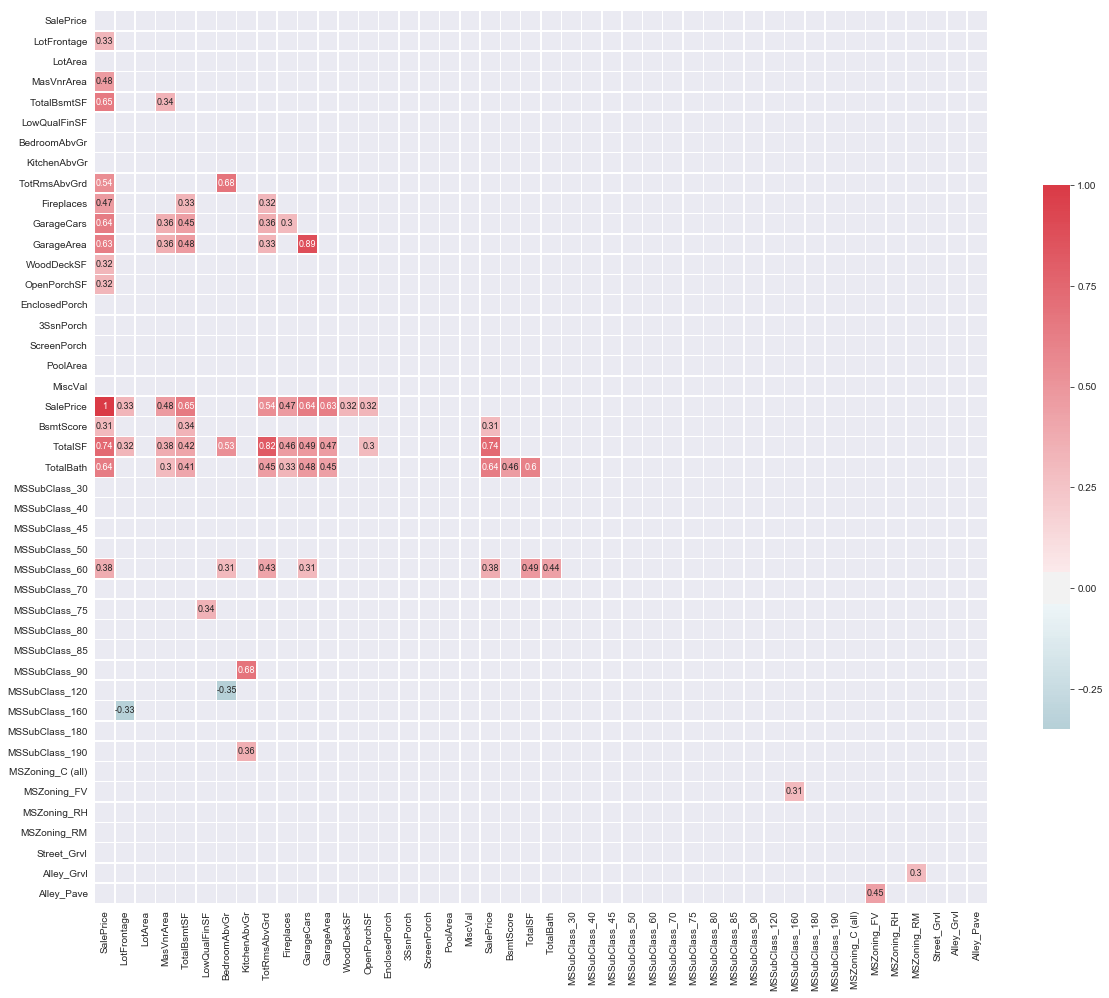

In [11]:
explore1 = train[['SalePrice', 'LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'LowQualFinSF', 'BedroomAbvGr',
                  'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars','GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                  'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'BsmtScore', 'TotalSF',
                  'TotalBath', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60',
                  'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120',
                  'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_C (all)', 'MSZoning_FV',
                  'MSZoning_RH', 'MSZoning_RM', 'Street_Grvl', 'Alley_Grvl', 'Alley_Pave']]
corr1 = explore1.corr()
f, ax = plt.subplots(figsize=(20,20))
mask = np.zeros_like(corr1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr1[(corr1 > 0.3)| (corr1 < -0.3)], mask=mask, cmap=cmap,
            xticklabels=corr1.columns.values,
            yticklabels=corr1.columns.values,
            center=0,
            square=True, linewidths=.5, annot=True, annot_kws={'size': 9}, cbar_kws={"shrink": .5})

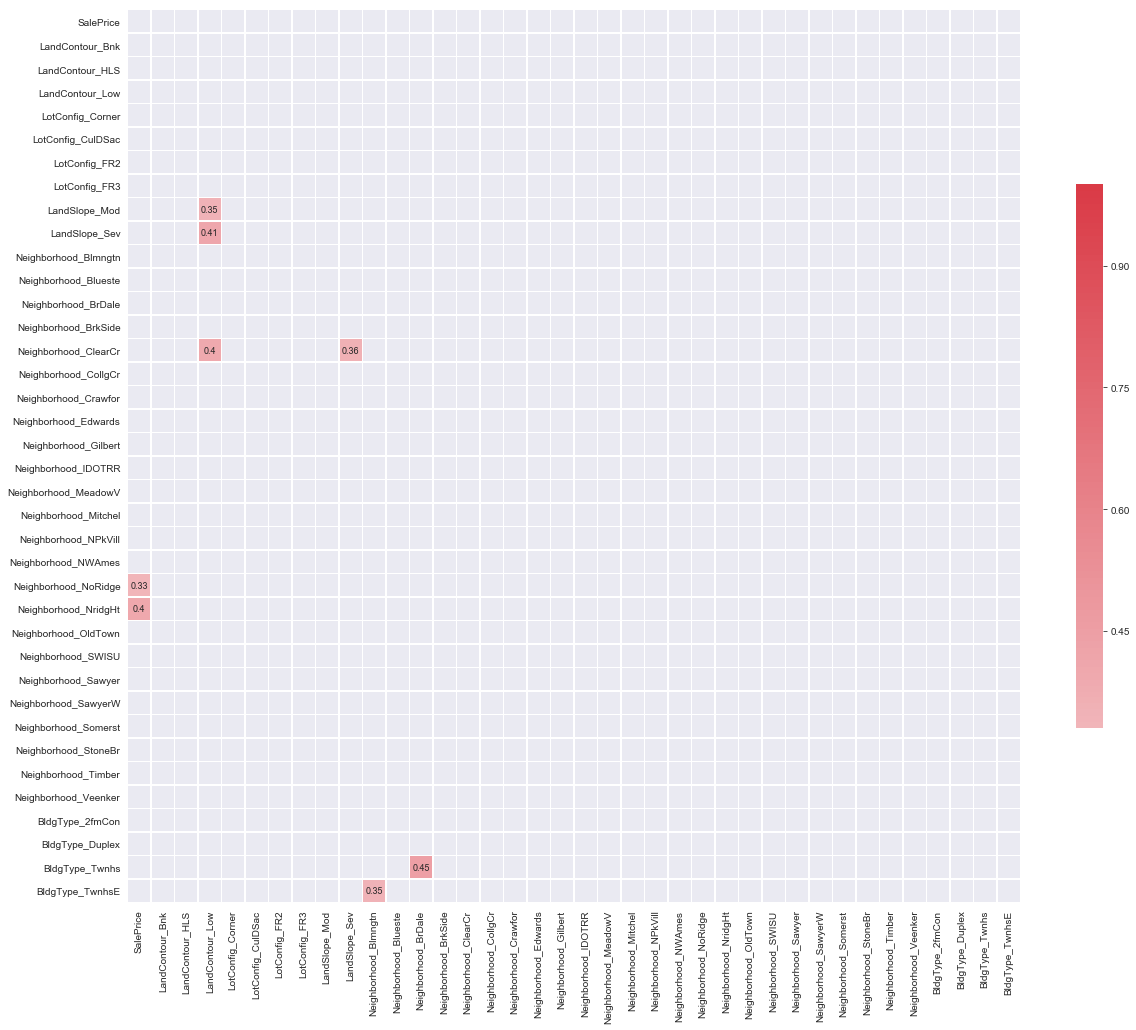

In [12]:
explore2 = train[['SalePrice', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_Corner', 
                  'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LandSlope_Mod', 'LandSlope_Sev',
                  'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
                  'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
                  'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
                  'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
                  'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
                  'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
                  'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE']]
corr2 = explore2.corr()
f, ax = plt.subplots(figsize=(20,20))
mask = np.zeros_like(corr2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr2[(corr2 > 0.3)| (corr2 < -0.3)], mask=mask, cmap=cmap, 
            xticklabels=corr2.columns.values,
            yticklabels=corr2.columns.values,
            center=0,
            square=True, linewidths=.5, annot=True, annot_kws={'size': 9}, cbar_kws={"shrink": .5})

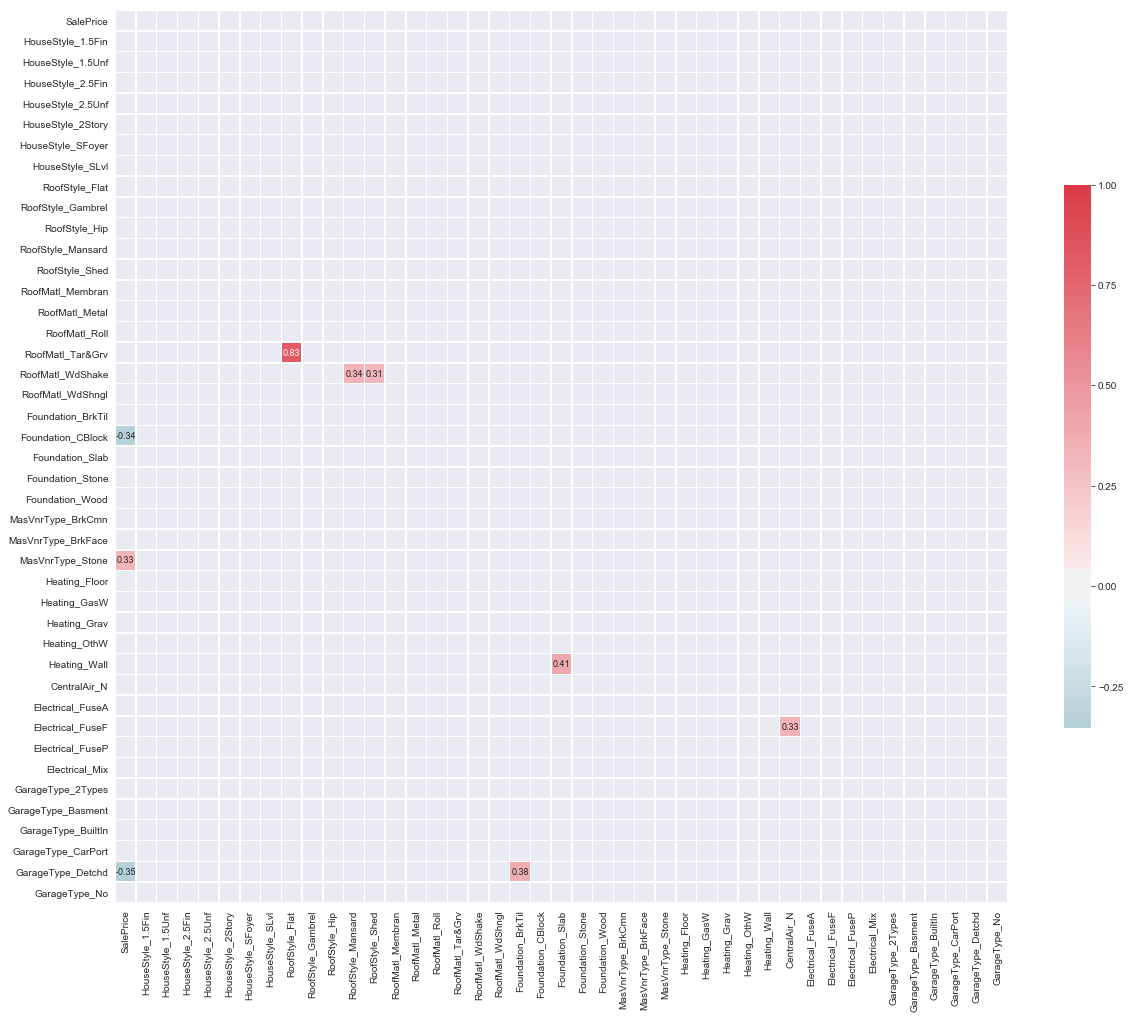

In [13]:
explore3 = train[['SalePrice','HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
                  'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Flat', 'RoofStyle_Gambrel',
                  'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal',
                  'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Foundation_BrkTil',
                  'Foundation_CBlock', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'MasVnrType_BrkCmn',
                  'MasVnrType_BrkFace', 'MasVnrType_Stone', 'Heating_Floor', 'Heating_GasW', 'Heating_Grav',
                  'Heating_OthW', 'Heating_Wall', 'CentralAir_N', 'Electrical_FuseA', 'Electrical_FuseF',
                  'Electrical_FuseP', 'Electrical_Mix', 'GarageType_2Types', 'GarageType_Basment',
                  'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_No']]
 
corr3 = explore3.corr()
f, ax = plt.subplots(figsize=(20,20))
mask = np.zeros_like(corr3, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr3[(corr3 > 0.3)| (corr3 < -0.3)], mask=mask, cmap=cmap, 
            xticklabels=corr3.columns.values,
            yticklabels=corr3.columns.values,
            center=0,
            square=True, linewidths=.5, annot=True, annot_kws={'size': 9}, cbar_kws={"shrink": .5})

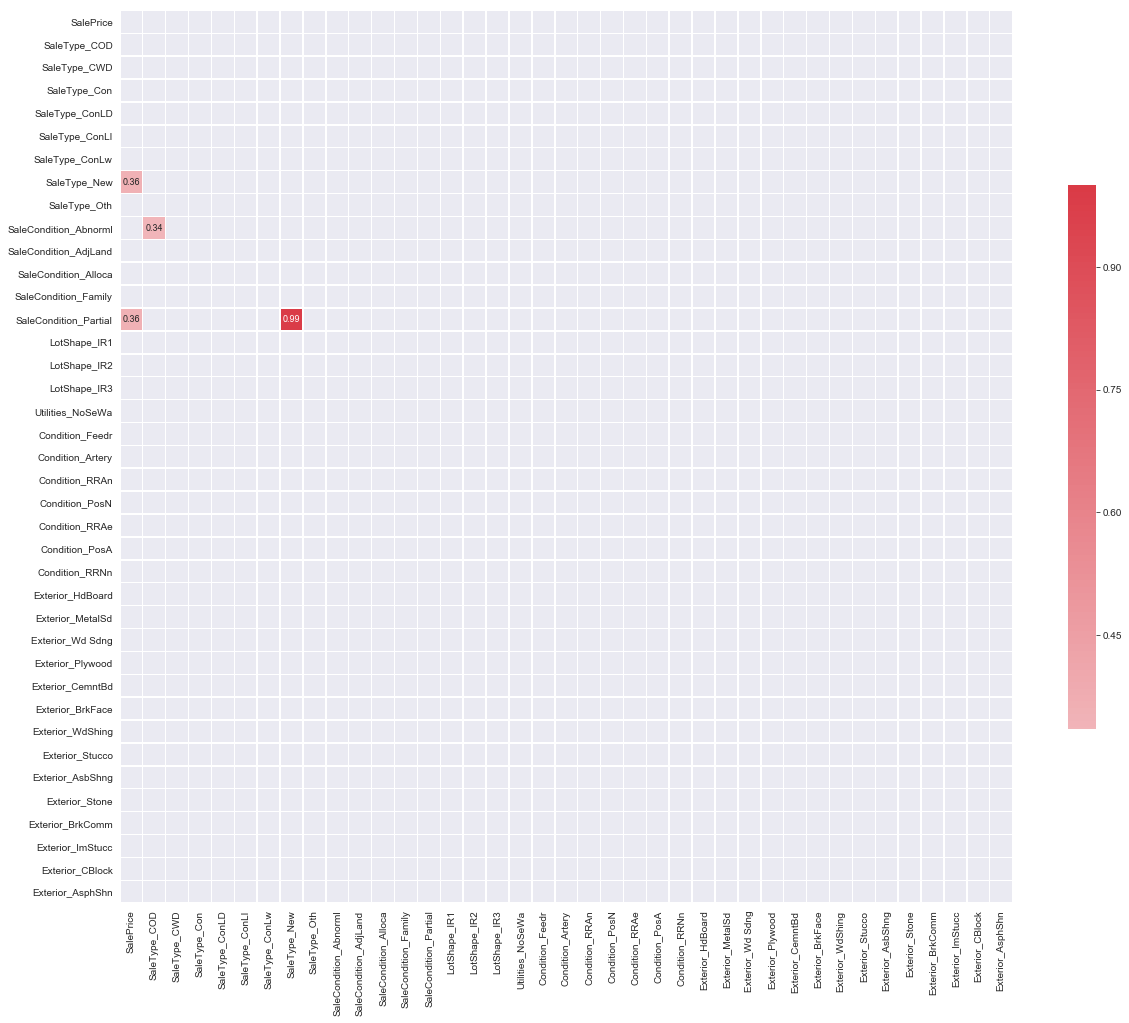

In [13]:
explore4 = train[['SalePrice', 'SaleType_COD', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
                  'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
                  'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Partial', 'LotShape_IR1',
                  'LotShape_IR2', 'LotShape_IR3', 'Utilities_NoSeWa', 'Condition_Feedr','Condition_Artery', 
                  'Condition_RRAn', 'Condition_PosN', 'Condition_RRAe', 'Condition_PosA', 'Condition_RRNn',
                  'Exterior_HdBoard', 'Exterior_MetalSd', 'Exterior_Wd Sdng', 'Exterior_Plywood',
                  'Exterior_CemntBd', 'Exterior_BrkFace', 'Exterior_WdShing', 'Exterior_Stucco', 'Exterior_AsbShng',
                  'Exterior_Stone', 'Exterior_BrkComm', 'Exterior_ImStucc', 'Exterior_CBlock', 'Exterior_AsphShn']]
corr4 = explore4.corr()
f, ax = plt.subplots(figsize=(20,20))
mask = np.zeros_like(corr4, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr4[(corr4 > 0.3)| (corr4 < -0.3)], mask=mask, cmap=cmap, 
            xticklabels=corr4.columns.values,
            yticklabels=corr4.columns.values,
            center=0,
            square=True, linewidths=.5, annot=True, annot_kws={'size': 9}, cbar_kws={"shrink": .5})

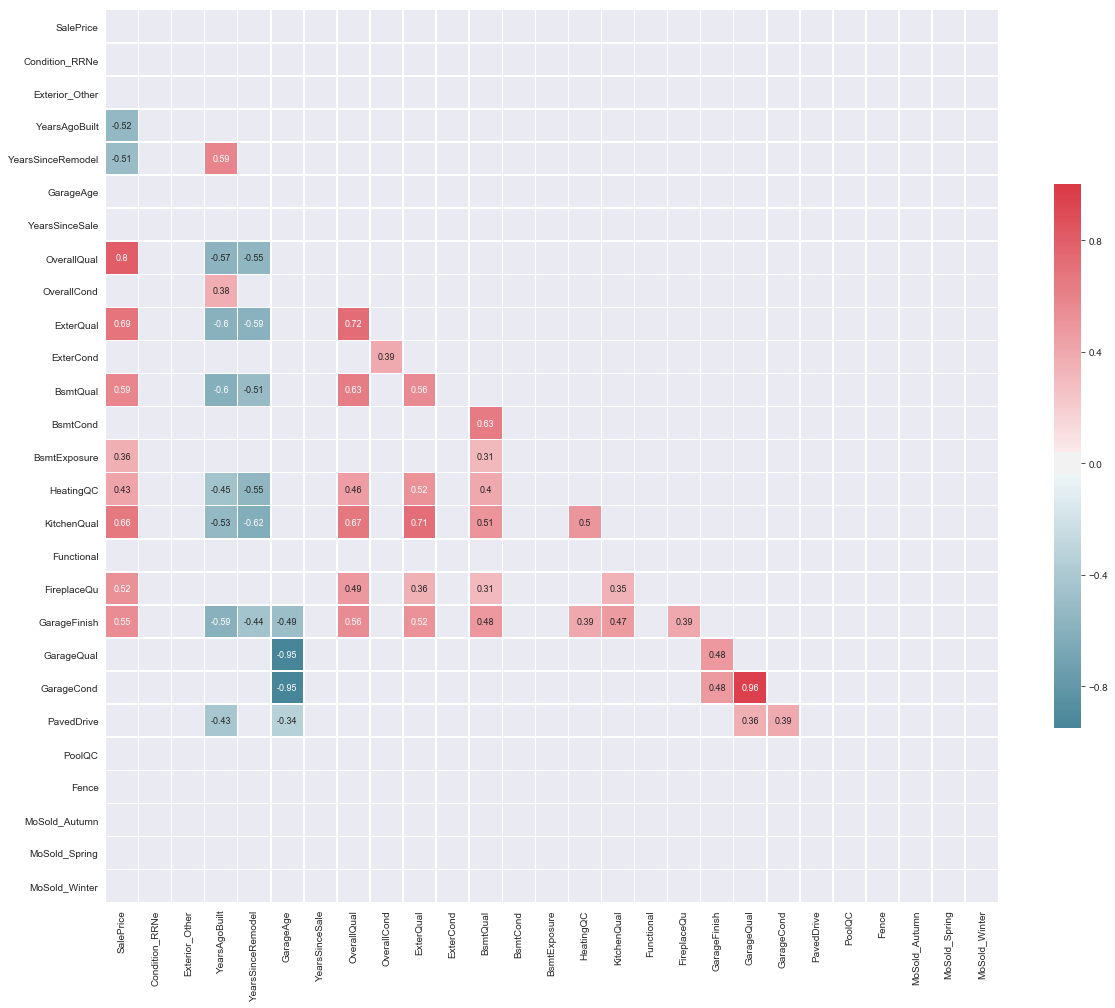

In [14]:
explore5 = train[['SalePrice', 'Condition_RRNe', 'Exterior_Other', 'YearsAgoBuilt', 'YearsSinceRemodel', 'GarageAge',
                  'YearsSinceSale', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                  'BsmtExposure', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MoSold_Autumn', 'MoSold_Spring',
                  'MoSold_Winter']]
corr5 = explore5.corr()
f, ax = plt.subplots(figsize=(20,20))
mask = np.zeros_like(corr5, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr5[(corr5 > 0.3)| (corr5 < -0.3)], mask=mask, cmap=cmap, 
            xticklabels=corr5.columns.values,
            yticklabels=corr5.columns.values,
            center=0,
            square=True, linewidths=.5, annot=True, annot_kws={'size': 9}, cbar_kws={"shrink": .5})

### Linear Regression of Clean, Non-dummified Ames Train Dataset

In [15]:
import statsmodels.api as sm

In [16]:
X = train.drop('SalePrice', axis = 1)
y = train['SalePrice']

In [17]:
X2 = sm.add_constant(X)

model = sm.OLS(y,X2)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     82.88
Date:                Wed, 14 Nov 2018   Prob (F-statistic):               0.00
Time:                        14:05:11   Log-Likelihood:                -16651.
No. Observations:                1458   AIC:                         3.367e+04
Df Residuals:                    1273   BIC:                         3.465e+04
Df Model:                         184                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.625e+

###  Boosted Feature Selection

### Random Forest

In [14]:
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV

randomForest = ensemble.RandomForestRegressor()
grid_para_forest = [{
    "n_estimators": [250, 500],
    "min_samples_leaf": range(10,15),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int),
    "random_state": [42]}]
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search_forest = grid_search_forest.fit(X, y)

In [15]:
print("Best parameters found: ", grid_search_forest.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_search_forest.best_score_)))

Best parameters found:  {'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 250, 'random_state': 42}
Lowest RMSE found:  29698.969546724267


In [17]:
rf = pd.DataFrame(list(zip(X.columns, grid_search_forest.best_estimator_.feature_importances_ ))).set_index(0).sort_values(1, ascending=False)

In [68]:
print(len(rf[rf[1] >= 0.0005].index))
rf[rf[1] >= 0.0005].index

28


Index(['OverallQual', 'TotalSF', 'TotalBsmtSF', 'BsmtScore', 'TotalBath',
       'GarageArea', 'LotArea', 'GarageCars', 'YearsAgoBuilt', 'BsmtQual',
       'TotRmsAbvGrd', 'KitchenQual', 'ExterQual', 'YearsSinceRemodel',
       'MasVnrArea', 'GarageAge', 'GarageFinish', 'FireplaceQu',
       'GarageType_Detchd', 'CentralAir_N', 'LotFrontage', 'OverallCond',
       'WoodDeckSF', 'OpenPorchSF', 'BsmtExposure', 'MSZoning_RM',
       'GarageQual', 'LotShape_IR1'],
      dtype='object', name=0)

In [69]:
rfFeat = pd.DataFrame(rf[rf[1] >= 0.0005])
rfFeat

,1
0,
OverallQual,0.651
TotalSF,0.140
TotalBsmtSF,0.063
BsmtScore,0.022
TotalBath,0.018
GarageArea,0.016
LotArea,0.012
GarageCars,0.011
YearsAgoBuilt,0.007


### XGBoost

In [35]:
import xgboost as xgb
xgbforest = xgb.XGBRegressor()
grid_para_xgbforest = [{
    "colsample_bytree": np.linspace(0.1, 0.9, 9),
    'max_depth':[2, 4, 6, 8],
    "n_estimators":[500, 800, 1000, 2000],
    "random_state": [42]}]
grid_search_xgbforest = GridSearchCV(estimator = xgbforest, param_grid = grid_para_xgbforest, 
                                     scoring = 'neg_mean_squared_error', cv = 5, n_jobs=-1)

grid_search_xgbforest = grid_search_xgbforest.fit(X, y)

In [37]:
print("Best parameters found: ", grid_search_xgbforest.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_search_xgbforest.best_score_)))

Best parameters found:  {'colsample_bytree': 0.4, 'max_depth': 2, 'n_estimators': 800, 'random_state': 42}
Lowest RMSE found:  21350.378712255773


In [40]:
xgb = pd.DataFrame(list(zip(X.columns, grid_search_xgbforest.best_estimator_.feature_importances_ ))).set_index(0).sort_values(1, ascending=False)

In [82]:
print(len(xgb[xgb[1] >= 0.001].index))
xgb[xgb[1] >= 0.001].index

96


Index(['TotalSF', 'TotalBsmtSF', 'LotArea', 'GarageArea', 'LotFrontage',
       'OverallQual', 'BsmtScore', 'OverallCond', 'YearsAgoBuilt',
       'MasVnrArea', 'WoodDeckSF', 'GarageAge', 'GarageCars', 'TotalBath',
       'YearsSinceRemodel', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
       'Neighborhood_StoneBr', 'PoolArea', 'TotRmsAbvGrd', 'Functional',
       'BsmtExposure', 'Exterior_BrkFace', 'YearsSinceSale', 'KitchenQual',
       'Neighborhood_NoRidge', 'MSZoning_C (all)', 'SaleCondition_Family',
       '3SsnPorch', 'BedroomAbvGr', 'SaleCondition_Abnorml',
       'Condition_Artery', 'Neighborhood_NridgHt', 'Neighborhood_Crawfor',
       'BsmtQual', 'SaleType_New', 'Fireplaces', 'ExterQual', 'MSZoning_FV',
       'Condition_Feedr', 'Condition_RRAe', 'LotConfig_CulDSac',
       'Neighborhood_Veenker', 'Neighborhood_Somerst', 'FireplaceQu',
       'MoSold_Winter', 'Neighborhood_Edwards', 'CentralAir_N',
       'Neighborhood_BrkSide', 'LotConfig_FR2', 'GarageFinish', 'GarageQua

In [84]:
xgbFeat = pd.DataFrame(xgb[xgb[1] >= 0.001])
xgbFeat.head()

,1
0,
TotalSF,0.087
TotalBsmtSF,0.072
LotArea,0.067
GarageArea,0.045
LotFrontage,0.043


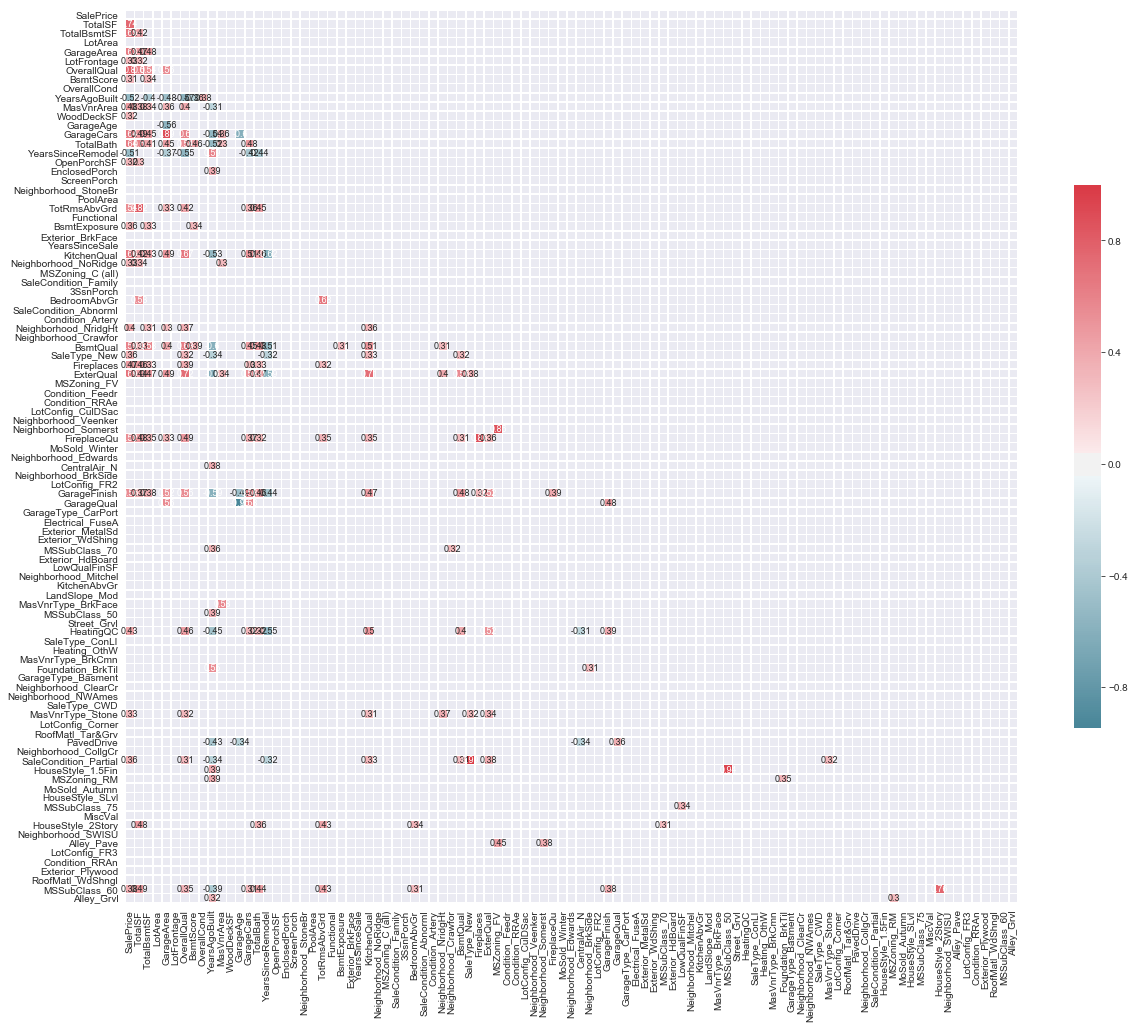

In [19]:
xCorr = train[['SalePrice','TotalSF', 'TotalBsmtSF', 'LotArea', 'GarageArea', 'LotFrontage',
       'OverallQual', 'BsmtScore', 'OverallCond', 'YearsAgoBuilt',
       'MasVnrArea', 'WoodDeckSF', 'GarageAge', 'GarageCars', 'TotalBath',
       'YearsSinceRemodel', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
       'Neighborhood_StoneBr', 'TotRmsAbvGrd', 'Functional',
       'BsmtExposure', 'Exterior_BrkFace', 'YearsSinceSale', 'KitchenQual',
       'Neighborhood_NoRidge', 'MSZoning_C (all)', 'SaleCondition_Family',
       '3SsnPorch', 'BedroomAbvGr', 'SaleCondition_Abnorml',
       'Condition_Artery', 'Neighborhood_NridgHt', 'Neighborhood_Crawfor',
       'BsmtQual', 'SaleType_New', 'Fireplaces', 'ExterQual', 'MSZoning_FV',
       'Condition_Feedr', 'Condition_RRAe', 'LotConfig_CulDSac',
       'Neighborhood_Veenker', 'Neighborhood_Somerst', 'FireplaceQu',
       'MoSold_Winter', 'Neighborhood_Edwards', 'CentralAir_N',
       'Neighborhood_BrkSide', 'LotConfig_FR2', 'GarageFinish', 'GarageQual',
       'GarageType_CarPort', 'Electrical_FuseA', 'Exterior_MetalSd',
       'Exterior_WdShing', 'MSSubClass_70', 'Exterior_HdBoard', 'LowQualFinSF',
       'Neighborhood_Mitchel', 'KitchenAbvGr', 'LandSlope_Mod',
       'MasVnrType_BrkFace', 'MSSubClass_50', 'Street_Grvl', 'HeatingQC',
       'SaleType_ConLI', 'Heating_OthW', 'MasVnrType_BrkCmn',
       'Foundation_BrkTil', 'GarageType_Basment', 'Neighborhood_ClearCr',
       'Neighborhood_NWAmes', 'SaleType_CWD', 'MasVnrType_Stone',
       'LotConfig_Corner', 'RoofMatl_Tar&Grv', 'PavedDrive',
       'Neighborhood_CollgCr', 'SaleCondition_Partial', 'HouseStyle_1.5Fin',
       'MSZoning_RM', 'MoSold_Autumn', 'HouseStyle_SLvl', 'MSSubClass_75',
       'MiscVal', 'HouseStyle_2Story', 'Neighborhood_SWISU', 'Alley_Pave',
       'LotConfig_FR3', 'Condition_RRAn', 'Exterior_Plywood',
       'RoofMatl_WdShngl', 'MSSubClass_60', 'Alley_Grvl']]
xCorr = xCorr.corr()
f, ax = plt.subplots(figsize=(20,20))
mask = np.zeros_like(xCorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(xCorr[(xCorr > 0.3)| (xCorr < -0.3)], mask=mask, cmap=cmap, 
            xticklabels=xCorr.columns.values,
            yticklabels=xCorr.columns.values,
            center=0,
            square=True, linewidths=.5, annot=True, annot_kws={'size': 9}, cbar_kws={"shrink": .5})

In [81]:
xgbFeatures = xgbFeat.to_csv('xgbFeatures.csv')
rfFeatures = rfFeat.to_csv('rfFeatures.csv')

### Model Selection and Training

In [51]:
from sklearn import linear_model

In [52]:
def fit_and_score(estimator, max_iter, X_train, X_test, y_train, y_test):
    """Fit the estimator on the train set and score it on both sets"""
    estimator.set_params(max_iter=max_iter)
    estimator.set_params(random_state=42)

    start = time.time()
    estimator.fit(X_train, y_train)

    fit_time = time.time() - start
    n_iter = estimator.n_iter_
    train_score = estimator.score(X_train, y_train)
    test_score = estimator.score(X_test, y_test)

    return fit_time, n_iter, train_score, test_score

In [53]:
# Define the estimators to compare
estimator_dict = {'No stopping criterion': linear_model.SGDClassifier(tol=None, n_iter_no_change=5),
                  'Training loss': linear_model.SGDClassifier(early_stopping=False, n_iter_no_change=5,
                               tol=0.1),
                  'Validation score': linear_model.SGDClassifier(early_stopping=True, n_iter_no_change=5,
                               tol=0.0001, validation_fraction=0.2)
}

In [54]:
results = []
for estimator_name, estimator in estimator_dict.items():
    print(estimator_name + ': ', end='')
    for max_iter in range(1, 50):
        print('.', end='')
        sys.stdout.flush()

        fit_time, n_iter, train_score, test_score = fit_and_score(
            estimator, max_iter, X_train, X_test, y_train, y_test)

        results.append((estimator_name, max_iter, fit_time, n_iter,
                        train_score, test_score))
        
        
    print('')

No stopping criterion: .................................................
Training loss: .................................................
Validation score: .................................................


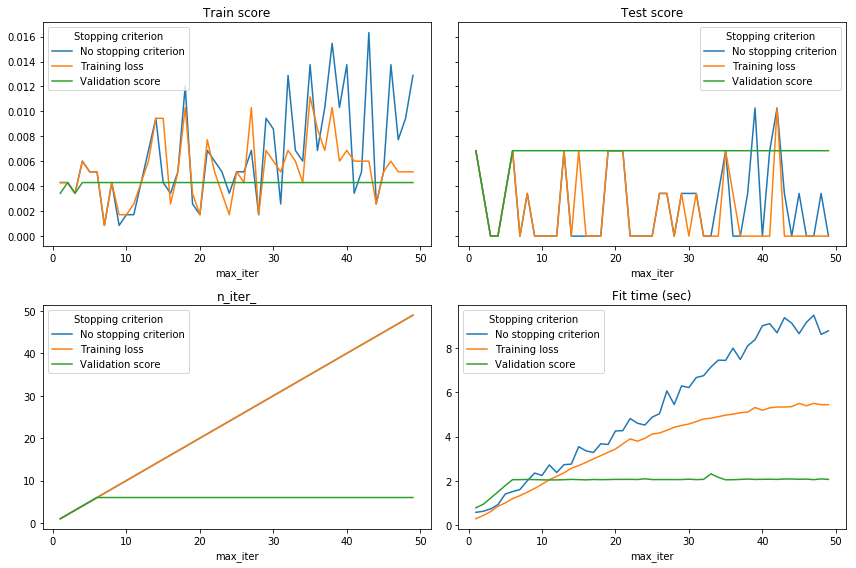

In [55]:
# Transform the results in a pandas dataframe for easy plotting
columns = [
    'Stopping criterion', 'max_iter', 'Fit time (sec)', 'n_iter_',
    'Train score', 'Test score'
]
results_df = pd.DataFrame(results, columns=columns)

# Define what to plot (x_axis, y_axis)
lines = 'Stopping criterion'
plot_list = [
    ('max_iter', 'Train score'),
    ('max_iter', 'Test score'),
    ('max_iter', 'n_iter_'),
    ('max_iter', 'Fit time (sec)'),
]

nrows = 2
ncols = int(np.ceil(len(plot_list) / 2.))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols,
                                                            4 * nrows))
axes[0, 0].get_shared_y_axes().join(axes[0, 0], axes[0, 1])

for ax, (x_axis, y_axis) in zip(axes.ravel(), plot_list):
    for criterion, group_df in results_df.groupby(lines):
        group_df.plot(x=x_axis, y=y_axis, label=criterion, ax=ax)
    ax.set_title(y_axis)
    ax.legend(title=lines)

fig.tight_layout()
plt.show()

In [79]:
# from sklearn.linear_model.stochastic_gradient import SGDRegressor

In [88]:
# from __future__ import print_function
# from collections import defaultdict

# import time
# import gc
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.datasets.samples_generator import make_regression
# from sklearn.ensemble.forest import RandomForestRegressor
# from sklearn.linear_model.ridge import Ridge
# from sklearn.linear_model.stochastic_gradient import SGDRegressor
# from sklearn.svm.classes import SVR
# from sklearn.utils import shuffle

In [89]:
# def atomic_benchmark_estimator(estimator, X_test, verbose=False):
#     """Measure runtime prediction of each instance."""
#     n_instances = X_test.shape[0]
#     runtimes = np.zeros(n_instances, dtype=np.float)
#     for i in range(n_instances):
#         instance = X_test[[i], :]
#         start = time.time()
#         estimator.predict(instance)
#         runtimes[i] = time.time() - start
#     if verbose:
#         print("atomic_benchmark runtimes:", min(runtimes), np.percentile(
#             runtimes, 50), max(runtimes))
#     return runtimes


# def bulk_benchmark_estimator(estimator, X_test, n_bulk_repeats, verbose):
#     """Measure runtime prediction of the whole input."""
#     n_instances = X_test.shape[0]
#     runtimes = np.zeros(n_bulk_repeats, dtype=np.float)
#     for i in range(n_bulk_repeats):
#         start = time.time()
#         estimator.predict(X_test)
#         runtimes[i] = time.time() - start
#     runtimes = np.array(list(map(lambda x: x / float(n_instances), runtimes)))
#     if verbose:
#         print("bulk_benchmark runtimes:", min(runtimes), np.percentile(
#             runtimes, 50), max(runtimes))
#     return runtimes


# def benchmark_estimator(estimator, X_test, n_bulk_repeats=30, verbose=False):
#     """
#     Measure runtimes of prediction in both atomic and bulk mode.

#     Parameters
#     ----------
#     estimator : already trained estimator supporting `predict()`
#     X_test : test input
#     n_bulk_repeats : how many times to repeat when evaluating bulk mode

#     Returns
#     -------
#     atomic_runtimes, bulk_runtimes : a pair of `np.array` which contain the
#     runtimes in seconds.

#     """
#     atomic_runtimes = atomic_benchmark_estimator(estimator, X_test, verbose)
#     bulk_runtimes = bulk_benchmark_estimator(estimator, X_test, n_bulk_repeats,
#                                              verbose)
#     return atomic_runtimes, bulk_runtimes


# def generate_dataset(n_train, n_test, n_features, noise=0.1, verbose=False):
#     """Generate a regression dataset with the given parameters."""
#     if verbose:
#         print("generating dataset...")

#     X, y, coef = make_regression(n_samples=n_train + n_test,
#                                  n_features=n_features, noise=noise, coef=True)

#     random_seed = 13
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, train_size=n_train, test_size=n_test, random_state=random_seed)
#     X_train, y_train = shuffle(X_train, y_train, random_state=random_seed)

#     X_scaler = StandardScaler()
#     X_train = X_scaler.fit_transform(X_train)
#     X_test = X_scaler.transform(X_test)

#     y_scaler = StandardScaler()
#     y_train = y_scaler.fit_transform(y_train[:, None])[:, 0]
#     y_test = y_scaler.transform(y_test[:, None])[:, 0]

#     gc.collect()
#     if verbose:
#         print("ok")
#     return X_train, y_train, X_test, y_test


# def boxplot_runtimes(runtimes, pred_type, configuration):
#     """
#     Plot a new `Figure` with boxplots of prediction runtimes.

#     Parameters
#     ----------
#     runtimes : list of `np.array` of latencies in micro-seconds
#     cls_names : list of estimator class names that generated the runtimes
#     pred_type : 'bulk' or 'atomic'

#     """

#     fig, ax1 = plt.subplots(figsize=(10, 6))
#     bp = plt.boxplot(runtimes, )

#     cls_infos = ['%s\n(%d %s)' % (estimator_conf['name'],
#                                   estimator_conf['complexity_computer'](
#                                       estimator_conf['instance']),
#                                   estimator_conf['complexity_label']) for
#                  estimator_conf in configuration['estimators']]
#     plt.setp(ax1, xticklabels=cls_infos)
#     plt.setp(bp['boxes'], color='black')
#     plt.setp(bp['whiskers'], color='black')
#     plt.setp(bp['fliers'], color='red', marker='+')

#     ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
#                    alpha=0.5)

#     ax1.set_axisbelow(True)
#     ax1.set_title('Prediction Time per Instance - %s, %d feats.' % (
#         pred_type.capitalize(),
#         configuration['n_features']))
#     ax1.set_ylabel('Prediction Time (us)')

#     plt.show()


# def benchmark(configuration):
#     """Run the whole benchmark."""
#     X_train, y_train, X_test, y_test = generate_dataset(
#         configuration['n_train'], configuration['n_test'],
#         configuration['n_features'])

#     stats = {}
#     for estimator_conf in configuration['estimators']:
#         print("Benchmarking", estimator_conf['instance'])
#         estimator_conf['instance'].fit(X_train, y_train)
#         gc.collect()
#         a, b = benchmark_estimator(estimator_conf['instance'], X_test)
#         stats[estimator_conf['name']] = {'atomic': a, 'bulk': b}

#     cls_names = [estimator_conf['name'] for estimator_conf in configuration[
#         'estimators']]
#     runtimes = [1e6 * stats[clf_name]['atomic'] for clf_name in cls_names]
#     boxplot_runtimes(runtimes, 'atomic', configuration)
#     runtimes = [1e6 * stats[clf_name]['bulk'] for clf_name in cls_names]
#     boxplot_runtimes(runtimes, 'bulk (%d)' % configuration['n_test'],
#                      configuration)


# def n_feature_influence(estimators, n_train, n_test, n_features, percentile):
#     """
#     Estimate influence of the number of features on prediction time.

#     Parameters
#     ----------

#     estimators : dict of (name (str), estimator) to benchmark
#     n_train : nber of training instances (int)
#     n_test : nber of testing instances (int)
#     n_features : list of feature-space dimensionality to test (int)
#     percentile : percentile at which to measure the speed (int [0-100])

#     Returns:
#     --------

#     percentiles : dict(estimator_name,
#                        dict(n_features, percentile_perf_in_us))

#     """
#     percentiles = defaultdict(defaultdict)
#     for n in n_features:
#         print("benchmarking with %d features" % n)
#         X_train, y_train, X_test, y_test = generate_dataset(n_train, n_test, n)
#         for cls_name, estimator in estimators.items():
#             estimator.fit(X_train, y_train)
#             gc.collect()
#             runtimes = bulk_benchmark_estimator(estimator, X_test, 30, False)
#             percentiles[cls_name][n] = 1e6 * np.percentile(runtimes,
#                                                            percentile)
#     return percentiles


# def benchmark_throughputs(configuration, duration_secs=0.1):
#     """benchmark throughput for different estimators."""
#     X_train, y_train, X_test, y_test = generate_dataset(
#         configuration['n_train'], configuration['n_test'],
#         configuration['n_features'])
#     throughputs = dict()
#     for estimator_config in configuration['estimators']:
#         estimator_config['instance'].fit(X_train, y_train)
#         start_time = time.time()
#         n_predictions = 0
#         while (time.time() - start_time) < duration_secs:
#             estimator_config['instance'].predict(X_test[[0]])
#             n_predictions += 1
#         throughputs[estimator_config['name']] = n_predictions / duration_secs
#     return throughputs

# def plot_n_features_influence(percentiles, percentile):
#     fig, ax1 = plt.subplots(figsize=(10, 6))
#     colors = ['r', 'g', 'b']
#     for i, cls_name in enumerate(percentiles.keys()):
#         x = np.array(sorted([n for n in percentiles[cls_name].keys()]))
#         y = np.array([percentiles[cls_name][n] for n in x])
#         plt.plot(x, y, color=colors[i], )
#     ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
#                    alpha=0.5)
#     ax1.set_axisbelow(True)
#     ax1.set_title('Evolution of Prediction Time with #Features')
#     ax1.set_xlabel('#Features')
#     ax1.set_ylabel('Prediction Time at %d%%-ile (us)' % percentile)
#     plt.show()

# def plot_benchmark_throughput(throughputs, configuration):
#     fig, ax = plt.subplots(figsize=(10, 6))
#     colors = ['r', 'g', 'b']
#     cls_infos = ['%s\n(%d %s)' % (estimator_conf['name'],
#                                   estimator_conf['complexity_computer'](
#                                       estimator_conf['instance']),
#                                   estimator_conf['complexity_label']) for
#                  estimator_conf in configuration['estimators']]
#     cls_values = [throughputs[estimator_conf['name']] for estimator_conf in
#                   configuration['estimators']]
#     plt.bar(range(len(throughputs)), cls_values, width=0.5, color=colors)
#     ax.set_xticks(np.linspace(0.25, len(throughputs) - 0.75, len(throughputs)))
#     ax.set_xticklabels(cls_infos, fontsize=10)
#     ymax = max(cls_values) * 1.2
#     ax.set_ylim((0, ymax))
#     ax.set_ylabel('Throughput (predictions/sec)')
#     ax.set_title('Prediction Throughput for different estimators (%d '
#                  'features)' % configuration['n_features'])
#     plt.show()